Team ID : PNT2022TMID35486

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing The ImageDataGenerator Library

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.layers import Convolution2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Loading and augmentation of given data

In [18]:
train = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test = ImageDataGenerator(rescale = 1./255)
A_train = train.flow_from_directory('/content/drive/MyDrive/IBM/dataset/train', target_size=(64,64), color_mode='grayscale',batch_size=3, class_mode='categorical')
A_test = test.flow_from_directory('/content/drive/MyDrive/IBM/dataset/test', target_size=(64,64), color_mode='grayscale',batch_size=3, class_mode='categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [19]:
print(A_train.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


In [20]:
print(A_test.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


In [7]:
model = Sequential()

Add 1st Convolution Layer and Pooling layer

In [8]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

Add 2nd Convolution Layer and Pooling layer

In [9]:
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

Add Flatten layer

In [10]:

model.add(Flatten())

Add dense layers

In [11]:
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 512)               3

Compile the model

In [12]:

model.compile(metrics=['accuracy'],loss='categorical_crossentropy',optimizer='adam')

Train the model

In [21]:
model.fit(A_train,steps_per_epoch = 594/3,epochs=25,validation_data=A_test,validation_steps=len(A_test))

Epoch 1/25
198/198 [==============================] - 166s 837ms/step - loss: 1.2332 - accuracy: 0.5202 - val_loss: 0.7653 - val_accuracy: 0.6333
Epoch 2/25
198/198 [==============================] - 14s 71ms/step - loss: 0.5577 - accuracy: 0.7980 - val_loss: 0.4178 - val_accuracy: 0.8333
Epoch 3/25
198/198 [==============================] - 14s 70ms/step - loss: 0.3978 - accuracy: 0.8535 - val_loss: 0.5630 - val_accuracy: 0.8667
Epoch 4/25
198/198 [==============================] - 14s 72ms/step - loss: 0.2862 - accuracy: 0.8906 - val_loss: 0.4033 - val_accuracy: 0.9000
Epoch 5/25
198/198 [==============================] - 14s 71ms/step - loss: 0.2048 - accuracy: 0.9259 - val_loss: 0.4166 - val_accuracy: 0.9000
Epoch 6/25
198/198 [==============================] - 14s 71ms/step - loss: 0.1839 - accuracy: 0.9343 - val_loss: 0.2461 - val_accuracy: 0.9000
Epoch 7/25
198/198 [==============================] - 14s 71ms/step - loss: 0.1237 - accuracy: 0.9529 - val_loss: 0.5040 - val_accurac

Save the model

In [24]:
model.save('gesture.h5')

In [25]:
json_model = model.to_json()
with open("model-gesture.json","w") as json_file:
  json_file.write(json_model)

Test the model

In [78]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
test_model = load_model('gesture.h5')
img_path="/content/drive/MyDrive/IBM/dataset/testimage1.jpg"

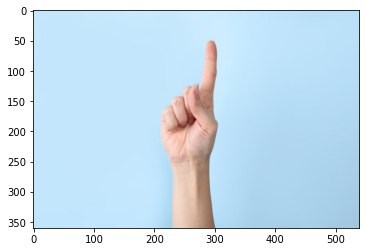

In [79]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

In [80]:
imgload = image.load_img(img_path,color_mode='grayscale',target_size=(64,64))
res = image.img_to_array(imgload)
res.shape

(64, 64, 1)

In [81]:
type(res)

numpy.ndarray

In [82]:
res = np.expand_dims(res,axis=0)
res.shape

(1, 64, 64, 1)

Predict the result

In [83]:
pred_res = np.argmax(test_model.predict(res),axis=-1)
pred_res

1/1 [==============================] - 0s 91ms/step


array([1])

In [84]:
index = ['0','1','2','3','4','5']
final_res = str(index[pred_res[0]])
final_res

'1'